Start by defining parameters, equations, constants, etc, etc

In [59]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

N = 10000  # number of points

# i made my code so that the midpoint of the transit would occur at a true anomaly of theta = 0
# so these variables are here so that my simulation only covers the transit and an appropriate arm length
# for HD 209458 b, the duration of transit takes about 5% of the orbit so im covering 10% of the orbit between +- frac_angle/2
frac = 10                                  # reciprocal of fraction of orbit covered i.e 1/10th orbit covered
frac_angle = 2*np.pi/frac                  # total angle covered

# constants in SI units
G = 6.67E-11                               # grav const (m^3 kg^-1 s^-2)
sigma = 5.67e-8                            # stafan-boltzmann (W m^-2 K^-4)
AU = 1.496e11                              # 1AU (m)
M_sol = 1.989E30                           # solar mass (kg)
M_jupiter = 1.898E27;                      # jupiter mass (kg)
R_sol = 6.96E8                             # solar radius (m)
R_jupiter = 6.99E7                         # jupiter radius (m)
day = 24*60*60                             # 1 day (s)

#stellar parameters
T = 6076                                    # temperature (K)
M_star = 1.1*M_sol                          # star mass (kg)
R_star = 1.21*R_sol                         # star radius (m)

#planetary parameters
a = 0.045*AU                                # semi major axis (m)
e = 0.018                                   # orbital eccentricities 
P = 3.5247*day                              # orbital period (s)
i = np.deg2rad(86.59); phi = 0              # inclination and periapsis (rad)
M_planet = 0.7*M_jupiter                    # planet mass (kg)
R_planet = 1.5*R_jupiter                    # planet radius (m)

# preliminary equations
a_star = (a*M_planet)/(M_star + M_planet)   # star to barycentre
a_planet = a - a_star                       # planet to barycentre

Define functions, lists, etc.

In [60]:
# distance between two gravitating bodies
def dist(a, angle):
    return (a*(1-e**2))/(1+e*np.cos(angle))

# coordinate transforms dictated by inclination angle
def xTransform(x, z):
    return x*np.cos(np.pi/2 - i) + z*np.sin(np.pi/2 - i)
def zTransform(x, z):
    return -x*np.sin(np.pi/2 - i) + z*np.cos(np.pi/2 - i)

# cosine rule
def cosine(a, b, c):
    cosA = (b**2 + c**2 - a**2)/(2*b*c)
    return np.arccos(cosA)

# funny area calculation from 'Transiting Exoplanets'
def area2(xi):
    alpha_1 = cosine(1, xi, p); alpha_2 = cosine(p, xi, 1)
    return R_star**2 * ((p**2)*alpha_1 + alpha_2 - (np.sqrt((4*xi**2) - (1 + xi**2 - p**2)**2))/2)

#lists lists lists
rP_list = []; rS_list = []; theta_list = []         # lists of orbital radius & angle subtended from starting point of orbit
x_planet = []; y_planet = []; z_planet = []; 
x_star = []; y_star = []                            # x, y, z positions of planet and star
trans_x_planet = []; trans_z_planet = []            # transformed x and z of planet orbit
trans_z_star = []

Now use Keplerian equations to calculate the trajectory of the planet around the star

In [61]:
theta = -frac_angle/2; z=0                ## start simulation at -1/2 of the entire angle covered
while (theta + phi) <= frac_angle/2:
    
    rJ = dist(a_planet, theta)
    rS = dist(a_star, theta-np.pi)
    xJ = rJ*np.cos(theta); yJ = rJ*np.sin(theta)
    xS = rS*np.cos(theta); yS = rS*np.sin(theta)
    
    theta_list.append(theta); rP_list.append(rJ); rS_list.append(rS)
    x_star.append(xS); y_star.append(yS) 
    x_planet.append(xJ); y_planet.append(yJ); z_planet.append(z)
    
    trans_x_planet.append(xTransform(xJ, 0))
    trans_z_planet.append(zTransform(xJ, 0))
    trans_z_star.append(zTransform(xS, 0))
    
    theta = theta + 2*np.pi/(frac*N)

time = [i * (P / (2*np.pi)) for i in theta_list]  # assuming that the planet orbits at a constant velocity
# fair assumption given that exoplanets detected by transit need to be fairly close to their star
#which means almost circular orbit

Plot fraction of orbit in the x-y plane and the transformed coordinates in y-z plane.
Star is there for illustration purposes :')

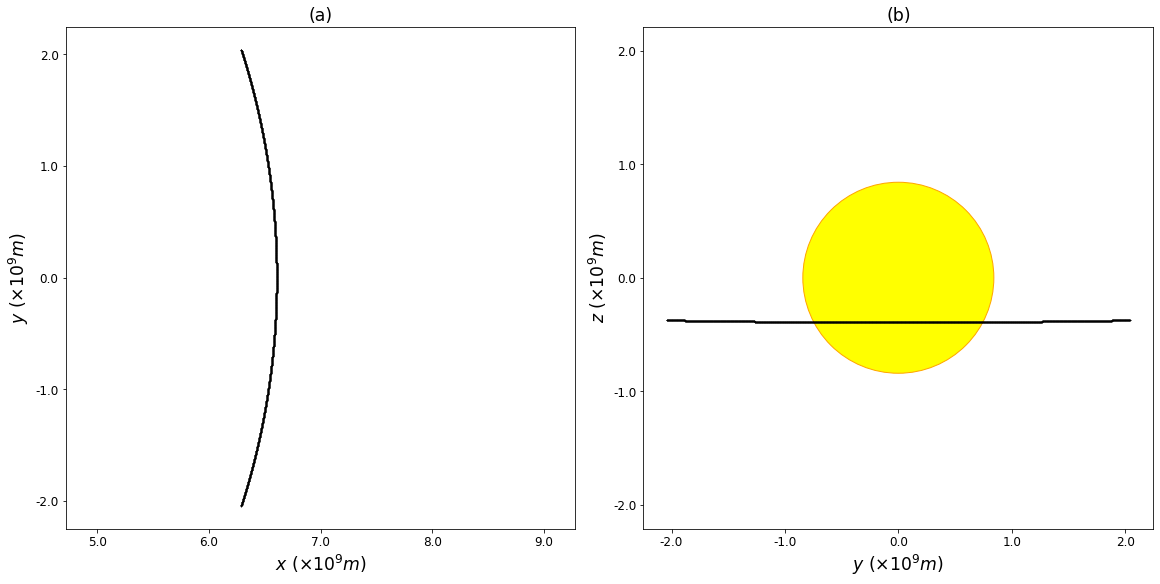

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout = True)
star = plt.Circle((0, 0), R_star, fc = 'yellow', ec = 'orange')

ax[0].plot(x_planet, y_planet, 'k.', markersize = 0.5); ax[0].axis('equal')
ax[0].set_xlabel(r'$x~(\times 10^{9}m)$', fontsize = 'xx-large')
ax[0].set_ylabel(r'$y~(\times 10^{9}m)$', fontsize = 'xx-large')
ax[0].set_title('(a)', fontsize = 'xx-large')
ax[0].set_xticks([5e9, 6e9, 7e9, 8e9, 9e9])
ax[0].set_xticklabels(['5.0', '6.0', '7.0', '8.0', '9.0'], fontsize = 'large')
ax[0].set_yticks([-2e9, -1e9, 0, 1e9, 2e9])
ax[0].set_yticklabels(['-2.0', '-1.0', '0.0', '1.0', '2.0'], fontsize = 'large')

ax[1].set_xticks([-2e9, -1e9, 0, 1e9, 2e9])
ax[1].set_xticklabels(['-2.0', '-1.0', '0.0', '1.0', '2.0'], fontsize = 'large')
ax[1].set_yticks([-2e9, -1e9, 0, 1e9, 2e9])
ax[1].set_yticklabels(['-2.0', '-1.0', '0.0', '1.0', '2.0'], fontsize = 'large')
ax[1].set_title('(b)', fontsize = 'xx-large')
ax[1].plot(y_planet, trans_z_planet, 'k.', markersize = 0.5)
ax[1].add_patch(star)
ax[1].set_xlabel(r'$y~(\times 10^{9}m)$', fontsize = 'xx-large');
ax[1].set_ylabel(r'$z~(\times 10^{9}m)$', fontsize = 'xx-large')
ax[1].axis('equal')

plt.show()

Calculate crossover area

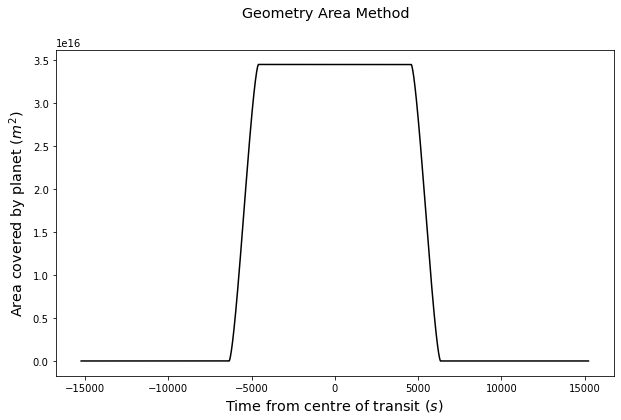

In [63]:
s = []  #distance from centres of the two bodies in the plane of the sky
p = R_planet/R_star  # ratio of radii

#using s^2 = y^2 + z^2
for i in range(N):
    dy_sq = (abs(y_planet[i]) + abs(y_star[i]))**2
    dz_sq = (abs(trans_z_planet[i]) + abs(trans_z_star[i]))**2
    if(y_planet[i]<0):
        s_val = np.sqrt(dy_sq + dz_sq)
    else:
        s_val = np.sqrt(dy_sq + dz_sq)
    s.append(s_val)
xi = [i/R_star for i in s]


area = []
for n in range(N):
    # no eclipsed area
    if 1 + p < abs(xi[n]):
        A = 0
    # a little eclipsed area but not fully
    if 1 - p >= abs(xi[n]) and x_planet[n] > 0:
        A = np.pi * p**2 * R_star**2
    #fully eclipsing
    if 1 - p < abs(xi[n]) and 1 + p >= abs(xi[n]) and x_planet[n] > 0:
        A = area2(abs(xi[n]))
    area.append(A)   
    
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(time, area, 'k-')
fig.suptitle('Geometry Area Method', fontsize = 'x-large')
ax.set_xlabel(r'Time from centre of transit $(s)$', fontsize = 'x-large')
ax.set_ylabel(r'Area covered by planet $(m^2)$', fontsize = 'x-large')
plt.show()

Now do the strip calculations to calculate limb darkening

In [65]:
dr = R_star/10000
I0 = sigma*T**4

#limb darkening laws
def LD_linear(r):
    u = 0.69
    mu = np.sqrt(R_star**2 - r**2)/R_star
    return I0*(1 - u*(1 - mu))
def LD_quad(r):
    u1 = 0.1; u2 = 0.95
    mu = np.sqrt(R_star**2 - r**2)/R_star
    return I0*(1 - u1*(1 - mu) - u2*(1-mu)**2)
def LD_log(r):
    u1 = 1; u2 = 0.6
    mu = np.sqrt(R_star**2 - r**2)/R_star
    # adding an epsilon in the log statement to avoid issues with rounding to 0
    return I0*(1 - u1*(1 - mu) - u2*mu*np.log(mu + 1e-5))
def LD_non_lin(r):
    #coefficients from D.K. Sing research note
    c1 = 0.5409; c2 = -0.0366; c3 = 0.5688; c4 = -0.3213
    mu = np.sqrt(R_star**2 - r**2)/R_star
    return I0*(1 - c1*(1-mu**(1/2)) - c2*(1-mu) - c3*(1-mu**(3/2)) - c4*(1-mu**2))


# this function is a generalised routine for calculating strip area and summming them for each time
# 'end' is the place which the planet no longer eclipses the star OR the edge of the planet furthest from star centre
# 'rad dist' is the radial distance from star centre at which the planet 'starts'
# 'func' is the limb darkening function used

def stripcalc(end, rad_dist, func):
    A_sum = 0; I_sum = 0
    while rad_dist > end:
        theta_star = 2*cosine(R_planet, rad_dist, s[i])
        A_strip = rad_dist*theta_star*dr;            A_sum += A_strip
        I_strip = A_strip*func(rad_dist);              I_sum += I_strip
        rad_dist -= dr
    return A_sum, I_sum


In [66]:
area_strip = []; 
LD_strip_lin = []; LD_strip_quad = []; LD_strip_log = []; LD_strip_nonlin = []

for i in tqdm(range(N)):
    
    if s[i] - R_planet > R_star and s[i] + R_planet > R_star:    
        area_strip.append(0)
        #LD_strip_lin.append(1)
        #LD_strip_quad.append(1)
        #LD_strip_log.append(1)
        LD_strip_nonlin.append(1)
    
    elif s[i] > R_star and s[i] - R_planet < R_star and s[i] + R_planet > R_star:
        area_strip.append(stripcalc(s[i] - R_planet, R_star, LD_quad)[0])
        #LD_strip_lin.append(stripcalc(s[i] - R_planet, R_star, LD_linear)[1])
        #LD_strip_quad.append(stripcalc(s[i] - R_planet, R_star, LD_quad)[1])
        #LD_strip_log.append(stripcalc(s[i] - R_planet, R_star, LD_log)[1])
        LD_strip_nonlin.append(stripcalc(s[i] - R_planet, R_star, LD_non_lin)[1])
            
    elif s[i] < R_star and s[i] + R_planet > R_star and s[i] - R_planet < R_star:
        area_strip.append(stripcalc(s[i] - R_planet, R_star, LD_quad)[0])
        #LD_strip_lin.append(stripcalc(s[i] - R_planet, R_star, LD_linear)[1])
        #LD_strip_quad.append(stripcalc(s[i] - R_planet, R_star, LD_quad)[1])
        #LD_strip_log.append(stripcalc(s[i] - R_planet, R_star, LD_log)[1])
        LD_strip_nonlin.append(stripcalc(s[i] - R_planet, R_star, LD_non_lin)[1])
    
    
    # in this next statement i found that i needed to +- dr on to the start and end conditions if i didnt want an infinite loop
    # adds in a very small error as dr is so small
    else:
        area_strip.append(stripcalc(s[i]-R_planet+dr, s[i]+R_planet-dr, LD_quad)[0])
        #LD_strip_lin.append(stripcalc(s[i]-R_planet+dr, s[i]+R_planet-dr, LD_linear)[1])
        #LD_strip_quad.append(stripcalc(s[i]-R_planet+dr, s[i]+R_planet-dr, LD_quad)[1])
        #LD_strip_log.append(stripcalc(s[i]-R_planet+dr, s[i]+R_planet-dr, LD_log)[1])
        LD_strip_nonlin.append(stripcalc(s[i]-R_planet+dr, s[i]+R_planet-dr, LD_non_lin)[1])
        

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:53<00:00, 57.78it/s]


In [67]:
# converting time from seconds to hours
time_h = [i/3600 for i in time]

# routine to sum total flux from each strip of star with no obscurance from planet
r = 0; I_sum = 0; P_sum_lin = 0; P_sum_quad = 0; P_sum_log = 0; P_sum_non_lin = 0
while r <= R_star:
    A = (np.pi*(r+dr)**2)-(np.pi*r**2)
    #P_sum_lin += LD_linear(r)*A
    #P_sum_quad += LD_quad(r)*A
    #P_sum_log += LD_log(r)*A
    P_sum_non_lin += LD_non_lin(r)*A
    r += dr

## calculating relative flux    

#pow_lin = [(P_sum_lin - i)/P_sum_lin for i in LD_strip_lin]
#pow_quad = [((P_sum_quad - i)/P_sum_quad) for i in LD_strip_quad]
#pow_log = [((P_sum_log - i)/P_sum_log) for i in LD_strip_log]
pow_non_lin = [((P_sum_non_lin - i)/P_sum_non_lin) for i in LD_strip_nonlin]

lots of silly plots

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(time_h, area_strip, 'k-')
ax.set_xlabel(r'Time from centre of transit $(s)$', fontsize = 'x-large')
ax.set_ylabel(r'Eclipsed area $(10^{16}~~m^2)$', fontsize = 'x-large')
ax.set_xlim(-4, 4)
ax.set_yticks([0, 0.5e16, 1e16, 1.5e16, 2e16, 2.5e16, 3e16])
ax.set_yticklabels(['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
plt.show()

In [ ]:
#comparing two methods of area calc
#pretty much the same

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(time_h, area_strip, 'r-', label = 'Strip Area Method')
ax.plot(time_h, area, 'b-', label = 'Geometry Area Method')
ax.set_xlabel(r'Time from centre of transit $(s)$', fontsize = 'x-large')
ax.set_ylabel(r'Area covered by planet $(m^2)$', fontsize = 'x-large')
ax.legend()
plt.show()

In [ ]:
compare = zip(area_strip, area)
error_area = []
for a, b in compare:
    #using absolute error
    error_area.append(abs(a - b))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6), constrained_layout = True)

ax[0].set_title('(a)', fontsize = 'x-large')
ax[0].plot(time_h, area_strip, 'k-')
ax[0].set_ylabel(r'Eclipsed area $(10^{16}~~m^2)$', fontsize = 'x-large')
ax[0].set_xlabel('Time from centre of transit (hours)', fontsize = 'x-large')
ax[0].set_xlim(-4, 4)
ax[0].set_yticks([0, 0.5e16, 1e16, 1.5e16, 2e16, 2.5e16, 3e16])
ax[0].set_yticklabels(['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])

ax[1].set_title('(b)', fontsize = 'x-large')
ax[1].plot(time_h, error_area, 'kx', markersize = 1)
ax[1].set_xlim(-4, 4)
ax[1].set_xlabel('Index', fontsize = 'x-large')
ax[1].set_ylabel(r'Absolute error in area calculation $(10^{12}~~m^2)$', fontsize = 'x-large')
ax[1].set_xlabel('Time from centre of transit (hours)', fontsize = 'x-large')
ax[1].set_yticks([0, 2e12, 4e12, 6e12, 8e12])
ax[1].set_yticklabels(['0.0', '2.0', '4.0', '6.0', '8.0'])
#ax.set_ylim(0,)
plt.show()

In [ ]:
print('Maximum error: {}, {:.2e}'.format(np.argmax(error_area), max(error_area)))
print('Correspoinding area: {:.2e}'.format(area_strip[np.argmax(error_area)]))
print('Maximum percentage error: {:.2e}'.format((max(error_area)/area_strip[np.argmax(error_area)])*100))

In [ ]:
# these are only for graphing purposes
graph_pow_quad = [i + 0.002 for i in pow_quad]
graph_pow_log = [i+0.004 for i in pow_log]

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(time_h, pow_lin, 'r-', markersize = 1, label = 'Linear LD law')
ax.plot(time_h, graph_pow_quad, 'b-', markersize = 1, label = 'Quadratic LD law')
ax.plot(time_h, graph_pow_log, 'g-', markersize = 1, label = 'Logarithmic LD law')
ax.set_xlabel(r'Time from centre of transit $(hours)$', fontsize = 'x-large')
ax.set_ylabel(r'Relative Flux', fontsize = 'x-large')
#ax.set_xlim(-2, 2)
ax.legend()
ax.set_yticks([1.004, 1.00, 0.996, 0.992, 0.988, 0.984])
plt.show()

print('Linear = {}'.format(min(pow_lin)))
print('Quadratic = {}'.format(min(pow_quad)))
print('Logarithmic = {}'.format(min(pow_log)))

!!!!

In [68]:
df = pd.read_csv('murawski_HD209458b.txt', header = None)

In [69]:
df

,0,1,2
0,2.458353e+06,1.002173,0.001882
1,2.458353e+06,1.000410,0.001887
2,2.458353e+06,1.001958,0.001871
3,2.458353e+06,1.000807,0.001874
4,2.458353e+06,0.998045,0.001879
...,...,...,...
149,2.458354e+06,0.998366,0.001659
150,2.458354e+06,0.998657,0.001655
151,2.458354e+06,0.999444,0.001661
152,2.458354e+06,1.000789,0.001666


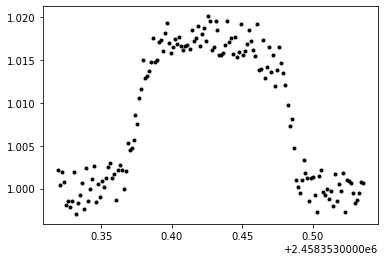

In [70]:
plt.plot(df[0], df[1], 'k.')

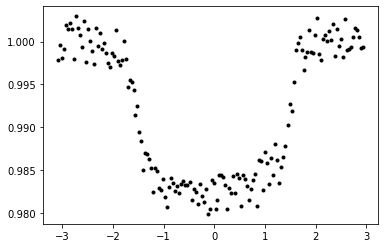

In [77]:
#'correcting' the data imported from ETD as it was upside down

flipped_data_HD209458b = []; corrected_time = []
mid = len(df[0])/2
    
for i in range(len(df[1])):
    
    x = (df.iloc[i, 1]-1)
    flipped_data_HD209458b.append(1 - x)
    
    t = (df.iloc[i, 0] *10E4)/3600 - (df.iloc[int(mid), 0]*10E4)/3600
    corrected_time.append(t-.05)
    
plt.plot(corrected_time, flipped_data_HD209458b, 'k.')

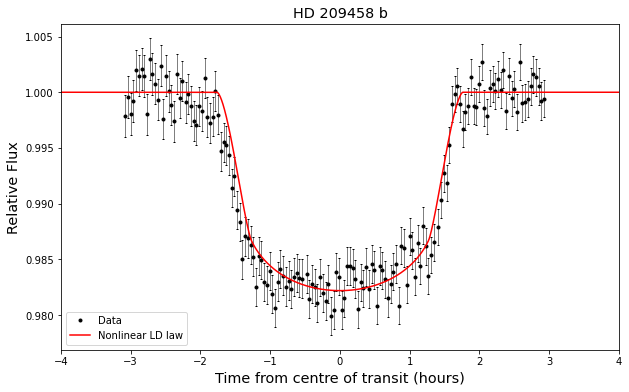

In [79]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(corrected_time, flipped_data_HD209458b, 'k.', label = 'Data')
ax.errorbar(corrected_time, flipped_data_HD209458b, xerr = None, yerr = df[2],
            ls = ' ', ecolor = 'black', elinewidth = .5, capsize = 1)
#ax.plot(time_h, pow_quad, 'r-', label = 'Quadratic LD law')
#ax.plot(time_h, pow_log, 'b-', label = 'Logarithmic LD law')
ax.plot(time_h, pow_non_lin, 'r-', label = 'Nonlinear LD law')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_title('HD 209458 b', fontsize = 'x-large')
ax.set_ylabel('Relative Flux', fontsize = 'x-large'); ax.set_xlabel('Time from centre of transit (hours)', fontsize = 'x-large')

plt.show()